<a href="https://colab.research.google.com/github/matthog/MLHW/blob/main/MattHogan_801190363_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem #1a

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the dataset from a raw GitHub URL
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

# 2. Load the dataset into a pandas DataFrame
data = pd.read_csv(url)

# 3. Extract features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# 4. Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature scaling (standardizing the data to have mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize parameters (theta)
def initialize_params(n):
    return np.zeros(n)

# 7. Linear Regression model
def hypothesis(X, theta):
    return np.dot(X, theta)

# 8. Compute cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# 9. Gradient Descent algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = hypothesis(X, theta)
        theta = theta - (alpha / m) * np.dot(X.T, (predictions - y))
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# 10. Train the model using gradient descent
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
n_features = X_train_scaled.shape[1]
theta = initialize_params(n_features)

theta, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)

# 11. Plot the training loss over iterations
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.show()

# 12. Evaluation on the test set
test_cost = compute_cost(X_test_scaled, y_test, theta)
print(f"Test Cost (MSE): {test_cost}")

# 13. Predictions for test set
predictions = hypothesis(X_test_scaled, theta)

# 14. Round predictions to the nearest thousand
predictions_rounded = np.round(predictions, -3)

# 15. Plot Predicted Prices vs Actual Prices
plt.scatter(y_test, predictions_rounded, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')  # y = x line
plt.title('Predicted vs Actual Prices (Rounded to Nearest Thousand)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Rounded)')
plt.legend()
plt.show()

# print out the first few predicted and actual values
print("Rounded Predicted prices: ", predictions_rounded[:5])
print("Actual prices: ", y_test[:5])



Problem #1b

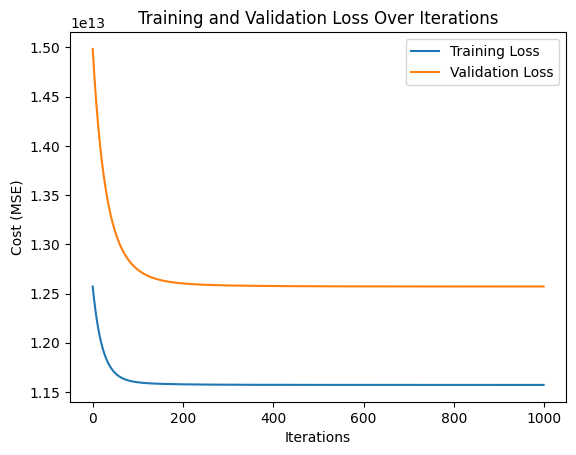

Test Cost (MSE): 12571242324416.96


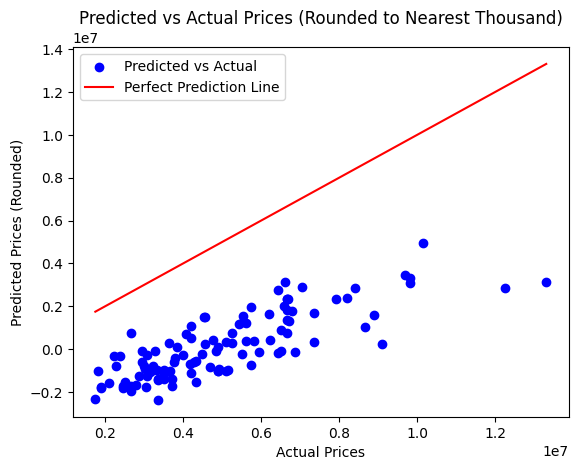

Rounded Predicted prices:  [  688000.  2357000. -1712000.  -169000. -1650000.]
Actual prices:  [4060000 6650000 3710000 6440000 2800000]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the dataset from a raw GitHub URL
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

# 2. Preprocess data - converting categorical variables to numerical (0/1)
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# 3. Extract features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

# 4. Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature scaling (standardizing the data to have mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize parameters (theta)
def initialize_params(n):
    return np.zeros(n)

# 7. Hypothesis (Linear Regression model)
def hypothesis(X, theta):
    return np.dot(X, theta)

# 8. Compute cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# 9. Gradient Descent algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history_train = []
    cost_history_test = []

    for i in range(iterations):
        predictions = hypothesis(X, theta)
        theta = theta - (alpha / m) * np.dot(X.T, (predictions - y))

        # Compute and store the training and test cost
        cost_train = compute_cost(X, y, theta)
        cost_test = compute_cost(X_test_scaled, y_test, theta)

        cost_history_train.append(cost_train)
        cost_history_test.append(cost_test)

    return theta, cost_history_train, cost_history_test

# 10. Train the model using gradient descent
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
n_features = X_train_scaled.shape[1]  # Number of features
theta = initialize_params(n_features)

theta, cost_history_train, cost_history_test = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)

# 11. Plot the training and validation loss over iterations
plt.plot(range(iterations), cost_history_train, label='Training Loss')
plt.plot(range(iterations), cost_history_test, label='Validation Loss')
plt.title('Training and Validation Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.show()

# 12. Evaluation on the test set
test_cost = compute_cost(X_test_scaled, y_test, theta)
print(f"Test Cost (MSE): {test_cost}")

# 13. Predictions for test set
predictions = hypothesis(X_test_scaled, theta)
predictions_rounded = np.round(predictions, -3)

# 14. Plot Predicted Prices vs Actual Prices
plt.scatter(y_test, predictions_rounded, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')  # y = x line
plt.title('Predicted vs Actual Prices (Rounded to Nearest Thousand)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Rounded)')
plt.legend()
plt.show()

# Optionally print out the first few predicted and actual values
print("Rounded Predicted prices: ", predictions_rounded[:5])
print("Actual prices: ", y_test[:5])


Problem 2

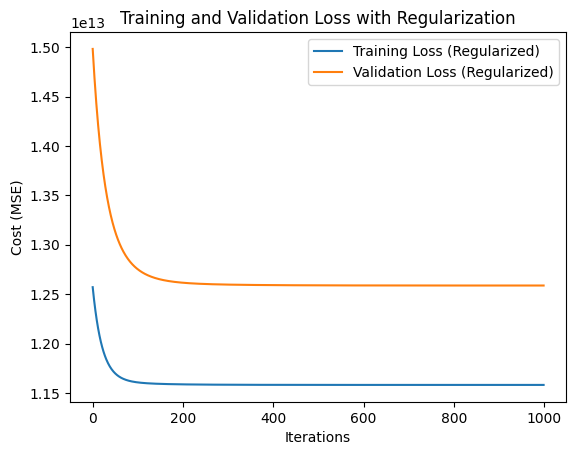

Test Cost (MSE) with Regularization: 12587368194741.19


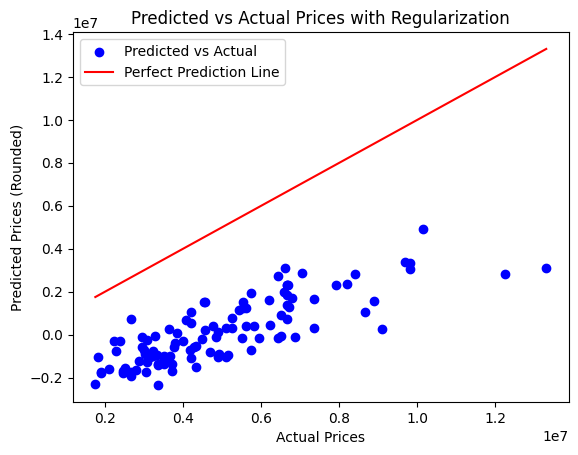

Rounded Predicted prices:  [  684000.  2320000. -1699000.  -164000. -1628000.]
Actual prices:  [4060000 6650000 3710000 6440000 2800000]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 1. Load the dataset from a raw GitHub URL
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

# 2. Preprocess data - converting categorical variables to numerical (0/1)
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# 3. Extract features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

# 4. Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Use the best input scaling method (Standardization in this case, from Problem 2a results)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize parameters (theta)
def initialize_params(n):
    return np.zeros(n)

# 7. Hypothesis (Linear Regression model)
def hypothesis(X, theta):
    return np.dot(X, theta)

# 8. Compute cost function
def compute_cost_regularized(X, y, theta, lambda_):
    m = len(y)
    predictions = hypothesis(X, theta)
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return mse + reg_term

# Regular cost function for evaluation
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# 9. Gradient Descent algorithm with L2 regularization
def gradient_descent_regularized(X, y, X_test, y_test, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history_train = []
    cost_history_test = []

    for i in range(iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        theta[0] = theta[0] - (alpha / m) * np.dot(X[:, 0].T, error)  # No regularization for theta[0]
        theta[1:] = theta[1:] - (alpha / m) * np.dot(X[:, 1:].T, error) - (alpha * lambda_ / m) * theta[1:]  # Regularization for the rest

        # Compute and store the training and test cost
        cost_train = compute_cost_regularized(X, y, theta, lambda_)
        cost_test = compute_cost(X_test, y_test, theta)

        cost_history_train.append(cost_train)
        cost_history_test.append(cost_test)

    return theta, cost_history_train, cost_history_test

# 10. Train the model using gradient descent with L2 regularization
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
lambda_ = 10  # Regularization strength
n_features = X_train_scaled.shape[1]  # Number of features
theta = initialize_params(n_features)

theta, cost_history_train, cost_history_test = gradient_descent_regularized(X_train_scaled, y_train, X_test_scaled, y_test, theta, alpha, iterations, lambda_)

# 11. Plot the training and validation loss over iterations
plt.plot(range(iterations), cost_history_train, label='Training Loss (Regularized)')
plt.plot(range(iterations), cost_history_test, label='Validation Loss (Regularized)')
plt.title('Training and Validation Loss with Regularization')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.show()

# 12. Evaluation on the test set
test_cost = compute_cost(X_test_scaled, y_test, theta)
print(f"Test Cost (MSE) with Regularization: {test_cost}")

# 13. Predictions for test set
predictions = hypothesis(X_test_scaled, theta)
predictions_rounded = np.round(predictions, -3)

# 14. Plot Predicted Prices vs Actual Prices
plt.scatter(y_test, predictions_rounded, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')  # y = x line
plt.title('Predicted vs Actual Prices with Regularization')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Rounded)')
plt.legend()
plt.show()

# Optionally print out the first few predicted and actual values
print("Rounded Predicted prices: ", predictions_rounded[:5])
print("Actual prices: ", y_test[:5])


problem 3

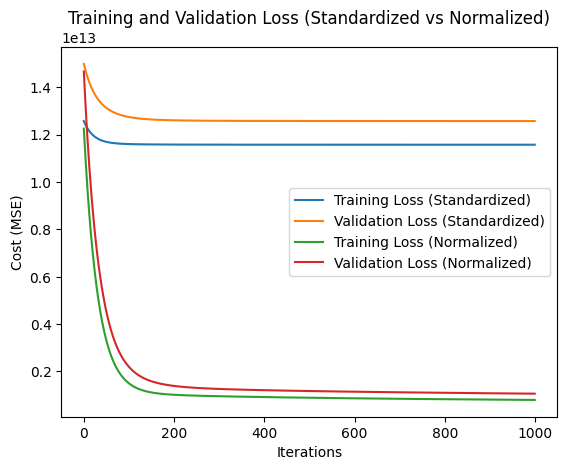

Test Cost (MSE) - Standardized: 12571242324416.96
Test Cost (MSE) - Normalized: 1057860926775.3391
Standardized - Predicted prices:  [  687734.26694145  2356960.00972513 -1711738.57969473  -168612.39908873
 -1649500.31424722]
Normalized - Predicted prices:  [3452722.55192757 6387978.85922952 2854549.75513814 4872333.34873864
 3235793.32337518]
Actual prices:  [4060000 6650000 3710000 6440000 2800000]


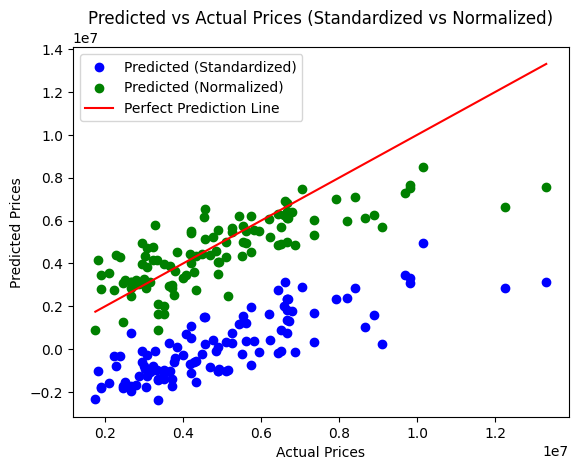

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 1. Load the dataset from a raw GitHub URL
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)

# 2. Preprocess data - converting categorical variables to numerical (0/1)
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# 3. Extract features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

# 4. Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardization of input features
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# 5.a Normalization of input features
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# 6. Initialize parameters
def initialize_params(n):
    return np.zeros(n)

# 7. Hypothesis
def hypothesis(X, theta):
    return np.dot(X, theta)

# 8. Compute cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# 9. Gradient Descent algorithm
def gradient_descent(X, y, X_test, y_test, theta, alpha, iterations):
    m = len(y)
    cost_history_train = []
    cost_history_test = []

    for i in range(iterations):
        predictions = hypothesis(X, theta)
        theta = theta - (alpha / m) * np.dot(X.T, (predictions - y))

        # Compute and store the training and test cost
        cost_train = compute_cost(X, y, theta)
        cost_test = compute_cost(X_test, y_test, theta)

        cost_history_train.append(cost_train)
        cost_history_test.append(cost_test)

    return theta, cost_history_train, cost_history_test

# 10. Train the model with Standardization
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
n_features = X_train_standardized.shape[1]  # Number of features
theta_standard = initialize_params(n_features)

theta_standard, cost_history_train_standard, cost_history_test_standard = gradient_descent(
    X_train_standardized, y_train, X_test_standardized, y_test, theta_standard, alpha, iterations)

# 11. Train the model with Normalization
theta_normalized = initialize_params(n_features)

theta_normalized, cost_history_train_normalized, cost_history_test_normalized = gradient_descent(
    X_train_normalized, y_train, X_test_normalized, y_test, theta_normalized, alpha, iterations)

# 12. Plot the training and validation loss over iterations
plt.plot(range(iterations), cost_history_train_standard, label='Training Loss (Standardized)')
plt.plot(range(iterations), cost_history_test_standard, label='Validation Loss (Standardized)')
plt.plot(range(iterations), cost_history_train_normalized, label='Training Loss (Normalized)')
plt.plot(range(iterations), cost_history_test_normalized, label='Validation Loss (Normalized)')
plt.title('Training and Validation Loss (Standardized vs Normalized)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.show()

# 13. Evaluation on the test set for both models
test_cost_standardized = compute_cost(X_test_standardized, y_test, theta_standard)
test_cost_normalized = compute_cost(X_test_normalized, y_test, theta_normalized)

print(f"Test Cost (MSE) - Standardized: {test_cost_standardized}")
print(f"Test Cost (MSE) - Normalized: {test_cost_normalized}")

# 14. Predictions and comparison with both scaling methods
predictions_standardized = hypothesis(X_test_standardized, theta_standard)
predictions_normalized = hypothesis(X_test_normalized, theta_normalized)

# Optionally print out a few predicted and actual values
print("Standardized - Predicted prices: ", predictions_standardized[:5])
print("Normalized - Predicted prices: ", predictions_normalized[:5])
print("Actual prices: ", y_test[:5])

# Plot Predicted vs Actual Prices for both Standardization and Normalization
plt.scatter(y_test, predictions_standardized, color='blue', label='Predicted (Standardized)')
plt.scatter(y_test, predictions_normalized, color='green', label='Predicted (Normalized)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.title('Predicted vs Actual Prices (Standardized vs Normalized)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()